In [1]:
import numpy as np
import pandas as pd

In [2]:
movies=pd.read_csv('movies.csv')


In [3]:
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [4]:
movies.shape

(9742, 3)

In [5]:
movies[movies['title']=='Matrix, The (1999)']

,movieId,title,genres
1939,2571,"Matrix, The (1999)",Action|Sci-Fi|Thriller


In [6]:
print(movies[movies['movieId']==356])

     movieId                title                    genres
314      356  Forrest Gump (1994)  Comedy|Drama|Romance|War


In [7]:
ratings=pd.read_csv('ratings.csv')

In [8]:
ratings.shape

(100836, 4)

In [9]:
ratings.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [10]:
len(ratings['userId'].unique())

610

In [11]:
ratings['movieId'].value_counts()

356       329
318       317
296       307
593       279
2571      278
         ... 
86279       1
86922       1
5962        1
87660       1
163981      1
Name: movieId, Length: 9724, dtype: int64

In [12]:
tags=pd.read_csv('tags.csv')
tags.head()

,userId,movieId,tag,timestamp
0,2,60756,funny,1445714994
1,2,60756,Highly quotable,1445714996
2,2,60756,will ferrell,1445714992
3,2,89774,Boxing story,1445715207
4,2,89774,MMA,1445715200


In [13]:
tags[tags['movieId']==2571]

,userId,movieId,tag,timestamp
815,424,2571,martial arts,1457842912
816,424,2571,sci-fi,1457842899
1646,474,2571,alternate universe,1137204991
2794,537,2571,philosophy,1424141098
2795,537,2571,post apocalyptic,1424141101


In [14]:
movies[movies['title']=="Terminator 2: Judgment Day (1991)"]

,movieId,title,genres
507,589,Terminator 2: Judgment Day (1991),Action|Sci-Fi


In [15]:
ratings.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [16]:
terminator = ratings[ratings['movieId']==589]

In [17]:
terminator.head()

,userId,movieId,rating,timestamp
552,5,589,3.0,847435258
806,6,589,3.0,845553317
886,7,589,2.5,1106635940
1286,11,589,4.0,902154266
1449,15,589,5.0,1510572012


In [18]:
terminator['rating'].value_counts()

4.0    67
5.0    64
3.0    37
3.5    23
4.5    19
2.5     6
2.0     3
0.5     3
1.0     2
Name: rating, dtype: int64

In [19]:
np.mean(terminator['rating'])

3.970982142857143

In [20]:
movies[movies['title']=='Fight Club (1999)']

,movieId,title,genres
2226,2959,Fight Club (1999),Action|Crime|Drama|Thriller


In [21]:
fight_club_rating=ratings[ratings['movieId']==2959]

In [22]:
fight_club_rating.head()

,userId,movieId,rating,timestamp
192,1,2959,5.0,964983282
458,4,2959,2.0,945078528
1134,10,2959,0.5,1455356582
1479,15,2959,2.5,1510571747
1635,16,2959,3.5,1377476874


In [23]:
import matplotlib.pyplot as plt

(array([ 3.,  0.,  1.,  5.,  3., 10., 17., 49., 49., 81.]),
 array([0.5 , 0.95, 1.4 , 1.85, 2.3 , 2.75, 3.2 , 3.65, 4.1 , 4.55, 5.  ]),
 <BarContainer object of 10 artists>)

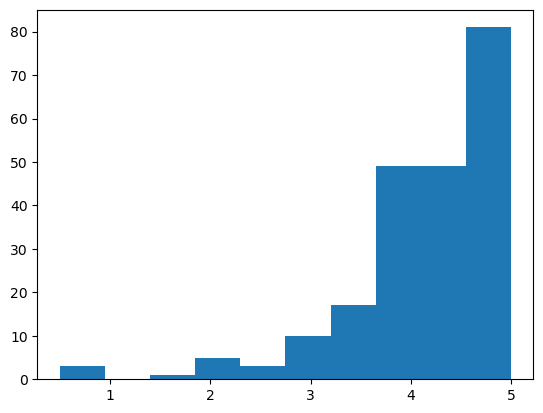

In [24]:
plt.hist(fight_club_rating['rating'])

In [25]:
# df = pd.merge(a, b, on='id', how='inner')
# df1 = df.groupby('userId')['rating'].agg(['count','mean']).reset_index()

In [26]:
ratings.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [27]:
df1 =ratings.groupby('movieId')['rating'].agg(['count','mean'])

In [28]:
df1

,count,mean
movieId,,
1,215,3.920930
2,110,3.431818
3,52,3.259615
4,7,2.357143
5,49,3.071429
...,...,...
193581,1,4.000000
193583,1,3.500000
193585,1,3.500000


In [29]:
df1=pd.merge(df1,movies,on='movieId',how='inner')

In [30]:
df1.head()

,movieId,count,mean,title,genres
0,1,215,3.920930,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,110,3.431818,Jumanji (1995),Adventure|Children|Fantasy
2,3,52,3.259615,Grumpier Old Men (1995),Comedy|Romance
3,4,7,2.357143,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,49,3.071429,Father of the Bride Part II (1995),Comedy


In [31]:
df1.shape

(9724, 5)

In [32]:
data=df1[df1['count']>50]

In [33]:
data.shape

(436, 5)

In [34]:
data.head()

,movieId,count,mean,title,genres
0,1,215,3.920930,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,110,3.431818,Jumanji (1995),Adventure|Children|Fantasy
2,3,52,3.259615,Grumpier Old Men (1995),Comedy|Romance
5,6,102,3.946078,Heat (1995),Action|Crime|Thriller
6,7,54,3.185185,Sabrina (1995),Comedy|Romance


In [35]:
# /Godfather, The (1972)
# Shawshank Redemption, The (1994)
# Jumanji (1995)
# Wolf of Wall Street, The (2013)

In [36]:
data[data['title']=='Godfather, The (1972)']

,movieId,count,mean,title,genres
659,858,192,4.289062,"Godfather, The (1972)",Crime|Drama


In [37]:
858

858

In [38]:
data[data['title']=='Shawshank Redemption, The (1994)']

,movieId,count,mean,title,genres
277,318,317,4.429022,"Shawshank Redemption, The (1994)",Crime|Drama


In [39]:
data[data['title']=='Jumanji (1995)']

,movieId,count,mean,title,genres
1,2,110,3.431818,Jumanji (1995),Adventure|Children|Fantasy


In [40]:
data[data['title']=='Wolf of Wall Street, The (2013)']

,movieId,count,mean,title,genres
8287,106782,54,3.916667,"Wolf of Wall Street, The (2013)",Comedy|Crime|Drama


In [41]:
data.head()

,movieId,count,mean,title,genres
0,1,215,3.920930,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,110,3.431818,Jumanji (1995),Adventure|Children|Fantasy
2,3,52,3.259615,Grumpier Old Men (1995),Comedy|Romance
5,6,102,3.946078,Heat (1995),Action|Crime|Thriller
6,7,54,3.185185,Sabrina (1995),Comedy|Romance


In [42]:
data.shape

(436, 5)

In [43]:
data.head()

,movieId,count,mean,title,genres
0,1,215,3.920930,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,110,3.431818,Jumanji (1995),Adventure|Children|Fantasy
2,3,52,3.259615,Grumpier Old Men (1995),Comedy|Romance
5,6,102,3.946078,Heat (1995),Action|Crime|Thriller
6,7,54,3.185185,Sabrina (1995),Comedy|Romance


In [44]:
data.sort_values('count',ascending=False,inplace=True)

C:\Users\Hp\AppData\Local\Temp\ipykernel_17564\1540147479.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.sort_values('count',ascending=False,inplace=True)


In [45]:
data.head()

,movieId,count,mean,title,genres
314,356,329,4.164134,Forrest Gump (1994),Comedy|Drama|Romance|War
277,318,317,4.429022,"Shawshank Redemption, The (1994)",Crime|Drama
257,296,307,4.197068,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller
510,593,279,4.161290,"Silence of the Lambs, The (1991)",Crime|Horror|Thriller
1938,2571,278,4.192446,"Matrix, The (1999)",Action|Sci-Fi|Thriller


In [46]:
data['genres'].unique()

array(['Comedy|Drama|Romance|War', 'Crime|Drama',
       'Comedy|Crime|Drama|Thriller', 'Crime|Horror|Thriller',
       'Action|Sci-Fi|Thriller', 'Action|Adventure|Sci-Fi',
       'Action|Adventure|Sci-Fi|Thriller', 'Action|Drama|War',
       'Action|Sci-Fi', 'Drama|War', 'Action|Crime|Drama|Thriller',
       'Adventure|Animation|Children|Comedy|Fantasy',
       'Crime|Mystery|Thriller', 'Drama|Romance', 'Mystery|Thriller',
       'Adventure|Drama|IMAX', 'Action|Adventure', 'Adventure|Fantasy',
       'Thriller', 'Action|Crime|Thriller',
       'Action|Adventure|Drama|Fantasy',
       'Adventure|Animation|Children|Comedy|Musical',
       'Drama|Horror|Mystery', 'Action|Adventure|Comedy|Romance|Thriller',
       'Mystery|Sci-Fi|Thriller',
       'Adventure|Animation|Children|Drama|Musical|IMAX',
       'Action|Romance|Thriller', 'Adventure|Comedy|Sci-Fi',
       'Action|Adventure|Drama',
       'Adventure|Animation|Children|Comedy|Fantasy|Romance',
       'Action|Comedy|Sci-Fi', 'Advent

In [49]:
data[data['genres']=='Sci-Fi']

,movieId,count,mean,title,genres


In [50]:
data.head()

,movieId,count,mean,title,genres
314,356,329,4.164134,Forrest Gump (1994),Comedy|Drama|Romance|War
277,318,317,4.429022,"Shawshank Redemption, The (1994)",Crime|Drama
257,296,307,4.197068,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller
510,593,279,4.161290,"Silence of the Lambs, The (1991)",Crime|Horror|Thriller
1938,2571,278,4.192446,"Matrix, The (1999)",Action|Sci-Fi|Thriller


In [51]:
data[data['title']=='Deadpool (2016)']

,movieId,count,mean,title,genres
8673,122904,54,3.833333,Deadpool (2016),Action|Adventure|Comedy|Sci-Fi


In [52]:
data[data['title']=='Terminator 2: Judgment Day (1991)']

,movieId,count,mean,title,genres
507,589,224,3.970982,Terminator 2: Judgment Day (1991),Action|Sci-Fi


In [53]:
data[data['title']=='X-Men: The Last Stand (2006)']

,movieId,count,mean,title,genres
6192,45499,52,3.355769,X-Men: The Last Stand (2006),Action|Sci-Fi|Thriller


In [54]:
data[data['title']=='Jurassic Park (1993)']

,movieId,count,mean,title,genres
418,480,238,3.75,Jurassic Park (1993),Action|Adventure|Sci-Fi|Thriller


In [56]:
data.head(50)

,movieId,count,mean,title,genres
314,356,329,4.164134,Forrest Gump (1994),Comedy|Drama|Romance|War
277,318,317,4.429022,"Shawshank Redemption, The (1994)",Crime|Drama
257,296,307,4.197068,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller
510,593,279,4.161290,"Silence of the Lambs, The (1991)",Crime|Horror|Thriller
1938,2571,278,4.192446,"Matrix, The (1999)",Action|Sci-Fi|Thriller
224,260,251,4.231076,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Sci-Fi
418,480,238,3.750000,Jurassic Park (1993),Action|Adventure|Sci-Fi|Thriller
97,110,237,4.031646,Braveheart (1995),Action|Drama|War
507,589,224,3.970982,Terminator 2: Judgment Day (1991),Action|Sci-Fi
461,527,220,4.225000,Schindler's List (1993),Drama|War


In [57]:
links=pd.read_csv('links.csv')

In [58]:
links.head()

,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0


In [59]:
links.shape

(9742, 3)

In [69]:
import requests
import numpy as np
from bs4 import BeautifulSoup

def scrapper(imdbId):
    id = str(int(imdbId))
    n_zeroes = 7 - len(id)
    new_id = "0"*n_zeroes + id
    URL = f"https://www.imdb.com/title/tt{new_id}/"
    request_header = {'Content-Type': 'text/html; charset=UTF-8', 
                      'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:109.0) Gecko/20100101 Firefox/119.0', 
                      'Accept-Encoding': 'gzip, deflate, br'}
    response = requests.get(URL, headers=request_header)
    soup = BeautifulSoup(response.text)
    imdb_rating = soup.find('movieId', attrs={'imdbId' : 'tmdbId'})
    return imdb_rating.text if imdb_rating else np.nan

In [61]:
scrapper(links['imdbId'])

TypeError: cannot convert the series to <class 'int'>